Student Name: Ramtin Moslemi

Student ID: 99170553

# Data Loading and Visulization [30 pts]

## Loading Data [20 pts]



In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np

def load_data(batch_size=64, shuffle=True):
    """
    Function to load the MNIST dataset using PyTorch DataLoader.

    Parameters:
    - batch_size: Batch size for training (default is 64).
    - shuffle: Whether to shuffle the dataset (default is True).

    Returns:
    - train_loader: DataLoader for training data.
    - test_loader: DataLoader for test data.
    """
    transform = transforms.Compose([transforms.ToTensor(),
                                    transforms.Normalize((0.5), (0.5))])

    # ToDo
    # train_loader and test_loader must be pytorch dataLoader objects
    # do proper train-test split
    mnist = datasets.MNIST(root='data/', download=True, transform=transform)
    train_data, test_data = random_split(mnist, [54000, 6000])

    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=shuffle)
    test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=shuffle)

    return train_loader, test_loader

def show_images(train_loader):
    """
    Function to display samples of data.

    Parameters:
    - train_loader: Image tensor loader.
    """

    # ToDo
    # no returns and only plots

    batch = next(iter(train_loader))
    images, labels = batch

    # Plot the images
    fig, axes = plt.subplots(8, 8, figsize=(12, 13))
    for i, image in enumerate(images):
        axes[i // 8, i % 8].imshow(image.squeeze(), cmap='gray')
        axes[i // 8, i % 8].axis('off')
        axes[i // 8, i % 8].set_title(f'Label: {labels[i]}')
    # Show the plot
    plt.show()


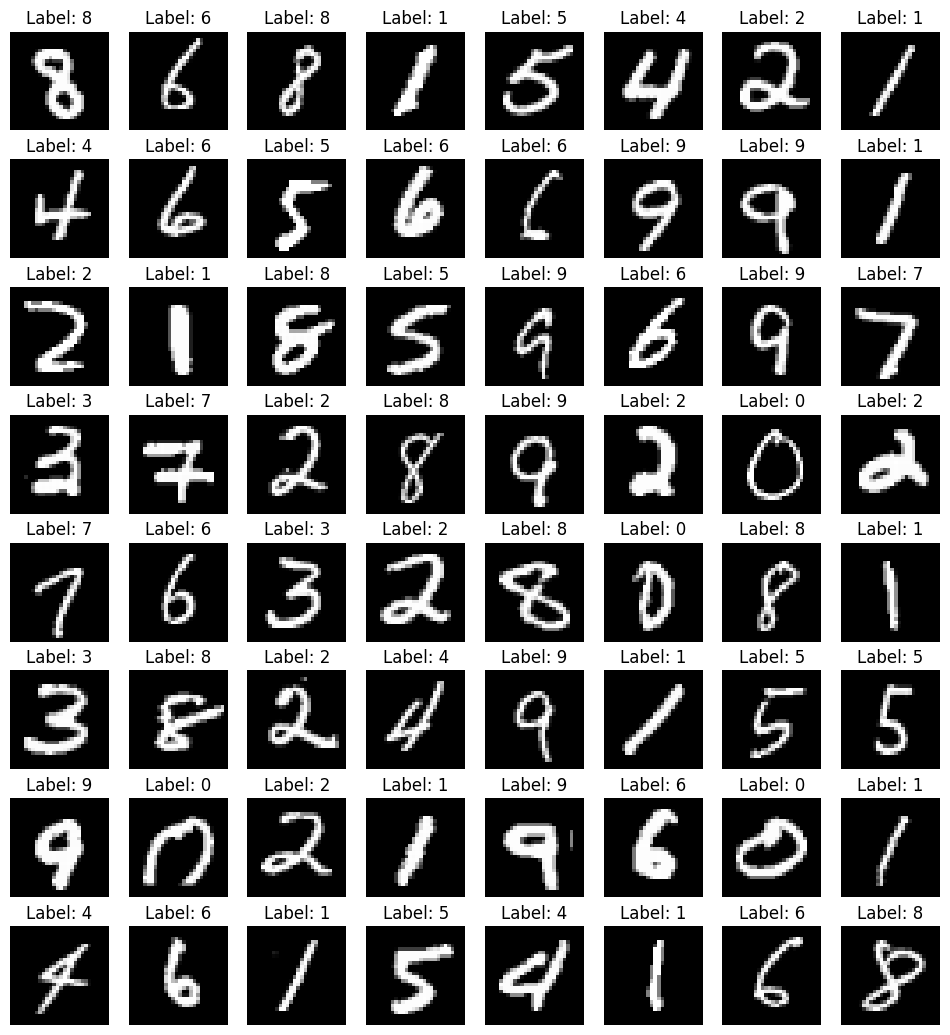

In [2]:

# Load the MNIST dataset
train_loader, test_loader = load_data()

# Visualize a batch of images from the training data
show_images(train_loader)


# Model Training [80 pts]

## Model Definition [20 pts]

In [3]:
import torch.nn as nn
import torch.nn.functional as F

class MLP(nn.Module):
    """
    Simple multi layer perceptron (MLP) class.
    """

    def __init__(self):
        """
        Constructor method to define the architecture of the MLP.
        """
        super(MLP, self).__init__()
        # ToDO
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)


    def forward(self, x):
        """
        Forward pass method to define how input data flows through the network layers.

        Parameters:
        - x: Input tensor.

        Returns:
        - out: Output tensor.
        """

        # ToDo
        out = self.flatten(x)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = F.relu(self.fc3(out))
        return out


In [4]:
from torchsummary import summary

# Create an instance of the MLP
model = MLP()

# Display model summary
summary(model, (1, 28, 28))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 256]         200,960
            Linear-3                   [-1, 64]          16,448
            Linear-4                   [-1, 10]             650
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.83
Estimated Total Size (MB): 0.84
----------------------------------------------------------------


## Training the model [30 pts]

Complete this function! Try to tune the parameters of Epoch and Learning Rate to get best results on the test set. You must achieve accuracy > 80% on test set to get the full grade

In [5]:
import torch.optim as optim

def train_model(model, train_loader, epochs, learning_rate):
    """
    Function to train the MLP model.

    Parameters:
    - model: MLP model to be trained.
    - train_loader: DataLoader for training data.
    - epochs: Number of epochs for training (default is 5).
    - learning_rate: Learning rate for optimization (default is 0.001).
    """
    # Define loss function and optimizer
    # ToDo
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), weight_decay=0.001)
    # Training loop
    for epoch in range(1, epochs + 1):
        running_loss = 0.0

        for i, data in enumerate(train_loader, 0):

            # ToDO
            x, y = data
            optimizer.zero_grad()
            pred = model(x)
            loss = criterion(pred, y)
            loss.backward()
            optimizer.step()
            running_loss += loss

            if i % 100 == 99:
                print('[Epoch %d, Batch %5d] Loss: %.3f' %
                      (epoch, i + 1, running_loss / 100))
                running_loss = 0.0

    print('Training finished')


In [6]:
train_model(model, train_loader, 30, 0.001)

[Epoch 1, Batch   100] Loss: 1.312
[Epoch 1, Batch   200] Loss: 0.691
[Epoch 1, Batch   300] Loss: 0.586
[Epoch 1, Batch   400] Loss: 0.553
[Epoch 1, Batch   500] Loss: 0.342
[Epoch 1, Batch   600] Loss: 0.287
[Epoch 1, Batch   700] Loss: 0.263
[Epoch 1, Batch   800] Loss: 0.238
[Epoch 2, Batch   100] Loss: 0.198
[Epoch 2, Batch   200] Loss: 0.224
[Epoch 2, Batch   300] Loss: 0.204
[Epoch 2, Batch   400] Loss: 0.199
[Epoch 2, Batch   500] Loss: 0.206
[Epoch 2, Batch   600] Loss: 0.183
[Epoch 2, Batch   700] Loss: 0.190
[Epoch 2, Batch   800] Loss: 0.168
[Epoch 3, Batch   100] Loss: 0.163
[Epoch 3, Batch   200] Loss: 0.147
[Epoch 3, Batch   300] Loss: 0.141
[Epoch 3, Batch   400] Loss: 0.156
[Epoch 3, Batch   500] Loss: 0.147
[Epoch 3, Batch   600] Loss: 0.157
[Epoch 3, Batch   700] Loss: 0.141
[Epoch 3, Batch   800] Loss: 0.144
[Epoch 4, Batch   100] Loss: 0.136
[Epoch 4, Batch   200] Loss: 0.127
[Epoch 4, Batch   300] Loss: 0.133
[Epoch 4, Batch   400] Loss: 0.132
[Epoch 4, Batch   50

## Model Evaluation [20 pts]

In [7]:
def evaluate_model(model, test_loader):
    """
    Function to evaluate the trained MLP model on the test set.

    Parameters:
    - model: Trained CNN model.
    - test_loader: DataLoader for test data.
    """
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            # ToDo
            x, y = data
            pred = model(x)
            correct += sum(torch.argmax(pred, axis=1) == y)
            total += y.shape[0]

    print('Accuracy on the test set: %d %%' % (100 * correct / total))


In [8]:
evaluate_model(model, test_loader)

Accuracy on the test set: 97 %


## Visulizations [10 pts]

In [9]:
def visualize_predictions(model, test_loader, num_samples):
    """
    Function to visualize some samples with their correct labels and predicted labels.

    Parameters:
    - model: Trained MLP model.
    - test_loader: DataLoader for test data.
    - num_samples: Number of samples to visualize.
    """
    model.eval()  # Set model to evaluation mode
    dataiter = iter(test_loader)
    images, labels = next(dataiter)

    with torch.no_grad():
        # ToDo
        # Get predicted labels
        preds = torch.argmax(model(images), axis=1)


    # Display the images with correct and predicted labels
    # ToDo

    fig, axes = plt.subplots(1, num_samples, figsize=(num_samples * 4, 4))
    for i in range(num_samples):
        axes[i].imshow(images[i].squeeze(), cmap='gray')
        axes[i].axis('off')
        axes[i].set_title(f'Correct: {labels[i]}, Prediction: {preds[i]}')


    plt.show()


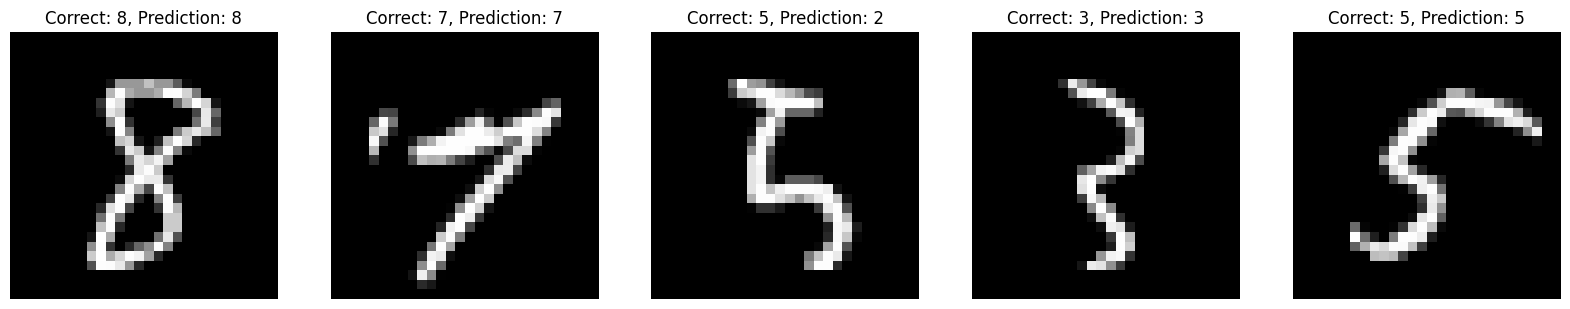

In [10]:
# Visualize predictions on the test set
visualize_predictions(model, test_loader, num_samples=5)
